<h1 style="text-align: center;">Projeto de Análise de Dados - Titanic</h1>

Esse projeto é referente a análise de dados dos passageiros do naufrágio do navio Titanic. A ideia aqui é através da analise desses dados respordermos algumas perguntas referentes ao naufrágio. 

<p><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Titanic-Cobh-Harbour-1912.JPG/330px-Titanic-Cobh-Harbour-1912.JPG"></p>


In [3]:
#-> Importando bibliotecas necessárias e carregando o arquivo de dados.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df_t = pd.read_csv('titanic-data-6.csv')

#Verificando os dados carregados
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Avaliando os dados
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#numero de amostras  (linhas e colunas)
print("O arquivo possui {0} amostras e {1} colunas".format(
        df_t.shape[0], df_t.shape[1] ))

O arquivo possui 891 amostras e 12 colunas


In [5]:
#Colunas com valores faltantes
print("Colunas com valores Faltantes: \n {0} \n".format(
    df_t.columns[df_t.isnull().any()].values))

Colunas com valores Faltantes: 
 ['Age' 'Cabin' 'Embarked'] 



In [7]:
#linhas duplicadas
print(" Duplicadas: {0} ".format(
        df_t.duplicated().sum()))

 Duplicadas: 0 


In [8]:
#Melhorando o indice da coluna (utilizando o PassengerId como indice)
df_t=pd.read_csv('titanic-data-6.csv', index_col='PassengerId')
df_t.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Verificando a quantidade de colunas agora.
print("O arquivo possui {0} colunas".format(
       df_t.shape[1] ))

O arquivo possui 11 colunas


In [10]:
#Verificando a quantidade de valores unicos em cada coluna
df_t.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

Limpeza dos dados

In [11]:
#Usando a média para prencher os valores faltantes na idade
df_t['Age'].fillna(df_t['Age'].mean(), inplace=True)
#Colunas com valores faltantes
print("Colunas com valores Faltantes: \n {0} \n".format(
    df_t.columns[df_t.isnull().any()].values))

Colunas com valores Faltantes: 
 ['Cabin' 'Embarked'] 



In [12]:
#Deixando todos os rótulos em letras minusculas
df_t.rename(columns=lambda x:x.strip().lower(), inplace=True)

# confirmando as mudanças
df_t.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [13]:
#Verificando a relação da 3ª Classe com o número da Cabine
terceira_classe = df_t.query('pclass == 3')
print("{0} amostras e {1} colunas".format(
        terceira_classe.shape[0], terceira_classe.shape[1]))
print("Total de Cabines nulas na amostra: {0}".format(
    sum(df_t['cabin'].isnull())))      
print("Total de Cabines nulas da Classe 3: {0}".format(
   sum(terceira_classe['cabin'].isnull())))

491 amostras e 11 colunas
Total de Cabines nulas na amostra: 687
Total de Cabines nulas da Classe 3: 479


In [14]:
#Preenchendo valores ausentes automaticamente-Colunas Cabin - Embarked
df_t['cabin'].fillna('Sem Cabine', inplace=True)
df_t['embarked'].fillna('N', inplace=True) # N = Sem porto de embarcação

#Confirmando as mudanças nas colunas com valores faltantes
print("Colunas com valores Faltantes: \n {0} \n".format(
    df_t.columns[df_t.isnull().any()].values))

Colunas com valores Faltantes: 
 [] 



Agora vamos as perguntas!!!!! 

<h5>Vamos investigar os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver!!</h5>

**Qual a porcentagem de sobreviventes?**

In [50]:
#Buscando o total de sobreviventes
survive = df_t.query('survived == 1')

#Buscando o total de não sobreviventes
not_survive = df_t.query('survived == 0')

print("Total de sobreviventes: {}".format(survive.shape[0]))
print("Total de mortos: {}".format(not_survive.shape[0]))

Total de sobreviventes: 342
Total de mortos: 549


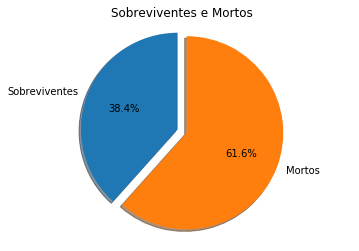

In [53]:
labels = 'Sobreviventes', 'Mortos'
total_class = [survive.shape[0], not_survive.shape[0]]
explode = (0, 0.1)
  
fig1, ax1 = plt.subplots()
  
ax1.pie(total_class, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Sobreviventes e Mortos')
  
plt.show()

**Conclusão** - Ao todo tivemos 38,4% de sobreviventes.

**Teve mais sobreviventes do sexo masculino ou feminino?**

In [15]:
#Buscando a quantidade de sobreviventes, total masculino e total feminino

#Verificando o total de sobreviventes por sexo
male_survive = survive.query("sex == 'male'")
female_survive = survive.query("sex == 'female'")

print("Total de Homens sobreviventes: {0}".format(male_survive.shape[0]))
print("Total de Mulheres sobreviventes: {0}".format(female_survive.shape[0]))


Total de sobreviventes: 342
Total de Homens sobreviventes: 109
Total de Mulheres sobreviventes: 233


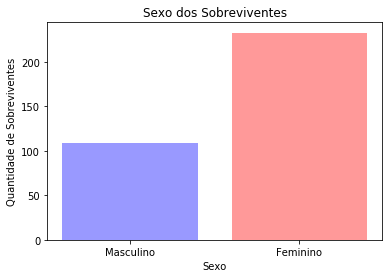

In [16]:
locations = [1, 2]
heights = [male_survive.shape[0], female_survive.shape[0]]
labels = ['Masculino', 'Feminino']
colors = ['b', 'r']
plt.bar(locations, heights, tick_label=labels, color=colors, alpha=0.4)
plt.title('Sexo dos Sobreviventes')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Sobreviventes');

**Conclusão** - Podemos perceber que a grande maioria dos sobreviventes foram do sexo feminino. 

**Relação entre a Classe (1ª, 2ª, 3ª),  Sexo e Sobrevivência dos passageiros do Titanic. Qual será a classe que teve mais sobreviventes? **

In [17]:
#Buscando a quantidade de sobreviventes - totais por classe - fazendo a relação também com o sexo

#Achando a quantidade de sobreviventes por classe
first = survive.query('pclass == 1')
second = survive.query('pclass == 2')
third = survive.query('pclass == 3')

#Descobrindo a quantidade de sobreviventes por sexo e classe
male_first = first.query("sex == 'male'")
female_first = first.query("sex == 'female'")
male_second = second.query("sex == 'male'")
female_second = second.query("sex == 'female'")
male_third = third.query("sex == 'male'")
female_third = third.query("sex == 'female'")


print("Total de sobreviventes da 1ª Classe: {0} - Total Masculino: {1} - Total Feminino: {2}".format(first.shape[0], male_first.shape[0], female_first.shape[0]))
print("Total de sobreviventes da 2ª Classe: {0} - Total Masculino: {1} - Total Feminino: {2}".format(second.shape[0], male_second.shape[0], female_second.shape[0]))
print("Total de sobreviventes da 3ª Classe: {0} - Total Masculino: {1} - Total Feminino: {2}".format(third.shape[0], male_third.shape[0], female_third.shape[0]))



Total de sobreviventes da 1ª Classe: 136 - Total Masculino: 45 - Total Feminino: 91
Total de sobreviventes da 2ª Classe: 87 - Total Masculino: 17 - Total Feminino: 70
Total de sobreviventes da 3ª Classe: 119 - Total Masculino: 47 - Total Feminino: 72


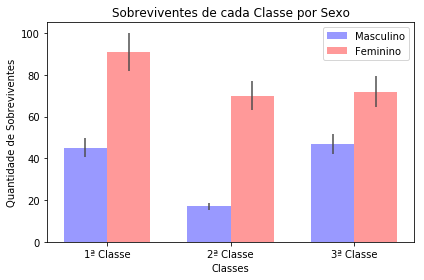

In [18]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

fig, ax = plt.subplots()

n_groups = 3

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

total_male=[male_first.shape[0], male_second.shape[0], male_third.shape[0]]
total_female=[female_first.shape[0], female_second.shape[0], female_third.shape[0]]

std_male = [(male_first.shape[0]/10), (male_second.shape[0]/10), (male_third.shape[0]/10)]
std_female = [(female_first.shape[0]/10), (female_second.shape[0]/10), (female_third.shape[0]/10)]

rects1 = ax.bar(index, total_male, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                yerr=std_male, label='Masculino')

rects2 = ax.bar(index + bar_width, total_female, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                yerr=std_female, label='Feminino')

ax.set_xlabel('Classes')
ax.set_ylabel('Quantidade de Sobreviventes')
ax.set_title('Sobreviventes de cada Classe por Sexo')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1ª Classe', '2ª Classe', '3ª Classe'))
ax.legend()

fig.tight_layout()
plt.show()

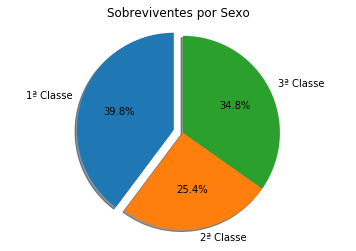

In [19]:
labels = '1ª Classe', '2ª Classe', '3ª Classe'
total_class = [first.shape[0], second.shape[0], third.shape[0]]
explode = (0.1, 0, 0)
  
fig1, ax1 = plt.subplots()
  
ax1.pie(total_class, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Sobreviventes por Sexo')
  
plt.show()

** Conclusão** - Podemos perceber através dessa analise que em todas as classes o maior número de sobreviventes foram do sexo feminino. A classe que obteve maior número de sobreviventes foi a 1º Classe obtendo uma taxa de sobrevivência de 39,8%, enquanto a 2ª classe obteve uma taxa de 25,4% e a 3ª classe obteve uma taxa de 34,8%.

**Qual será a faixa etaria que teve mais sobreviventes?**

In [44]:
#Encontrando as pessoas por faixa etaria 
crianca = survive.query('age <= 17')
jovem = survive.query('17 < age <= 30')
adulto = survive.query('30 < age <= 50')
idoso = survive.query('age > 50')

print("Total de sobreviventes crianças (até 17 anos): {0} sobreviventes".format(crianca.shape[0]))
print("Total de sobreviventes jovens (entre 18 e 30 anos): {0} sobreviventes".format(jovem.shape[0]))
print("Total de sobreviventes adultos (entre 31 e 50 anos): {0} sobreviventes".format(adulto.shape[0]))
print("Total de sobreviventes idosos (acima de 50 anos): {0} sobreviventes".format(idoso.shape[0]))


Total de sobreviventes crianças (até 17 anos): 61 sobreviventes
Total de sobreviventes jovens (entre 18 e 30 anos): 157 sobreviventes
Total de sobreviventes adultos (entre 31 e 50 anos): 102 sobreviventes
Total de sobreviventes idosos (acima de 50 anos): 22 sobreviventes


Text(0.5,1,'Sobreviventes por Faixa Etaria')

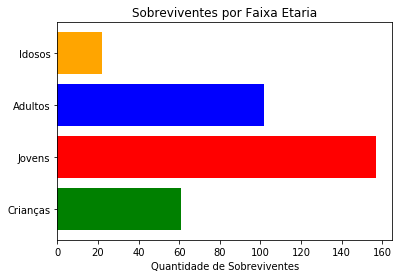

In [47]:
locations = [1, 2,3,4]
heights = [crianca.shape[0], jovem.shape[0], adulto.shape[0], idoso.shape[0]]
labels = ['Crianças', 'Jovens', 'Adultos', 'Idosos']
colors = ['green', 'red', 'blue', 'orange']
plt.barh(locations, heights, align='center', color= colors, ecolor='black',tick_label=labels )
plt.xlabel('Quantidade de Sobreviventes')
plt.title('Sobreviventes por Faixa Etaria')

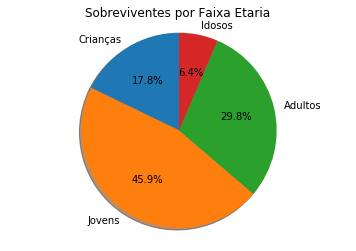

In [48]:
labels = 'Crianças', 'Jovens', 'Adultos', 'Idosos'
total_class = [crianca.shape[0], jovem.shape[0], adulto.shape[0], idoso.shape[0]]
explode = (0, 0, 0, 0)
  
fig1, ax1 = plt.subplots()
  
ax1.pie(total_class, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Sobreviventes por Faixa Etaria')
  
plt.show()

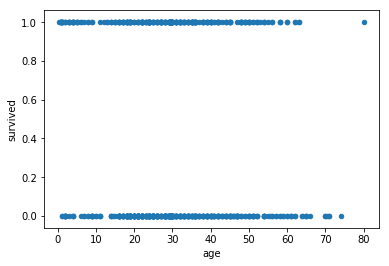

In [49]:
df_t.plot(kind='scatter', x='age', y='survived');

**Conclusão** - Chegamos a conclusão que o grupo de jovens (idade entre 18 e 30 anos) teve uma taxa de sobrevivencia de 45,9%, sendo a faixa etária com melhor taxa de sobrevivência. 
<ul><li>Adultos (idade entre 31 e 50 anos) - 29,8%</li>
<li>Crianças (abaixo de 18 anos) - 17,8% </li>
<li>Idosos (acima de 50 anos) - 6,4%</li></ul>

**Qual porto de embarque teve mais sobreviventes? **

In [55]:
#Achando a quantidade de sobreviventes por porto de embarque
cherboorg = survive.query('embarked == "C"')
queenstown = survive.query('embarked == "Q"')
southampton = survive.query('embarked == "S"')

print("Total de sobreviventes que embarcaram em Cherboorg: {0} sobreviventes".format(cherboorg.shape[0]))
print("Total de sobreviventes que embarcaram em Queenstown: {0} sobreviventes".format(queenstown.shape[0]))
print("Total de sobreviventes que embarcaram em Southampton: {0} sobreviventes".format(southampton.shape[0]))

Total de sobreviventes que embarcaram em Cherboorg: 93 sobreviventes
Total de sobreviventes que embarcaram em Queenstown: 30 sobreviventes
Total de sobreviventes que embarcaram em Southampton: 217 sobreviventes


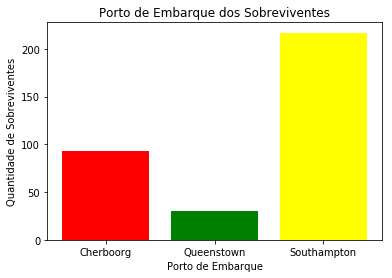

In [73]:
labels = 'Cherboorg', 'Queenstown', 'Southampton'
heights = [cherboorg.shape[0], queenstown.shape[0], southampton.shape[0]]
locations = [1, 2, 3]
colors = ['red', 'green', 'yellow']
plt.bar(locations, heights, tick_label=labels, color=colors)
plt.title('Porto de Embarque dos Sobreviventes')
plt.xlabel('Porto de Embarque')
plt.ylabel('Quantidade de Sobreviventes');

**Conclusão** - Tiveram mais sobreviventes que embarcaram do porto de Southampton. (Lembrando que nessa analise não foi considerado as pessoas que não tinham os seus portos de embarques registrados)

<h1>Conclusão Final</h1>
<h2>Foram 342 sobreviventes (38,4%)</h2>
<p>Podemos concluir que as principais caracteristicas das pessoas que conseguiram se salvar no acidente são:</p>
    <ul style="list-style: none;">
    <li><strong>Eram do sexo Feminino (233 sobreviventes)</strong></li>
    <li><strong>Estavam na 1ª Classe (39,8% sobreviveram)</strong></li>
    <li><strong>Eram jovens, entre 18 e 30 anos (45,9% sobreviveram)</strong></li>
    <li><strong>Embarcaram no porto de Southampton (217 sobreviventes)</strong></li>
    </ul>
    <p><i>Outra curiosidade que podemos observar é que a taxa de sobrevivência dos idosos foi baixa e que as pessoas que estavam na 3ª 
    classe tiveram uma taxa alta de sobrevivência <strong>(34,8%)</strong> e também teve menor diferença entre a taxa de sobreviventes entre os sexos (masculino / feminino)</i></p>